
Degree 1 회귀 계수는 [-1.64] 입니다.
Degree 1 MSE = 0.24228187486438818.

Degree 4 회귀 계수는 [ 11.04 -30.63  16.71   3.23] 입니다.
Degree 4 MSE = 0.13920749124179663.

Degree 15 회귀 계수는 [-2.97665000e+03  1.03910500e+05 -1.87420257e+06  2.03716013e+07
 -1.44873202e+08  7.09315378e+08 -2.47065800e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377529e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE = 181238256.73710066.


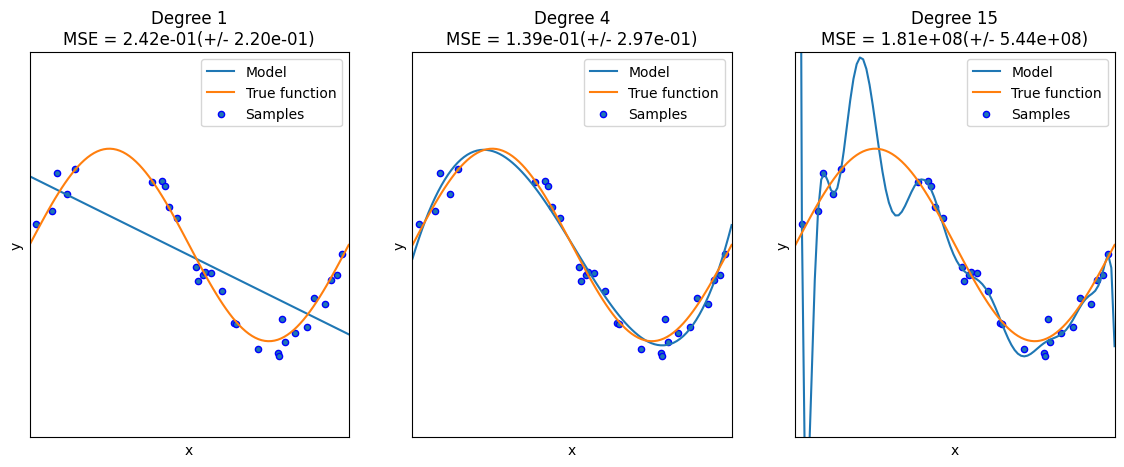

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# 샘플 데이터 생성
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

# 실제 함수
def true_fun(x):
    return np.sin(2 * np.pi * x)

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    pipeline.fit(X.reshape(-1, 1), y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE = {1}.'.format(degrees[i], -1 * np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

plt.show()